In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

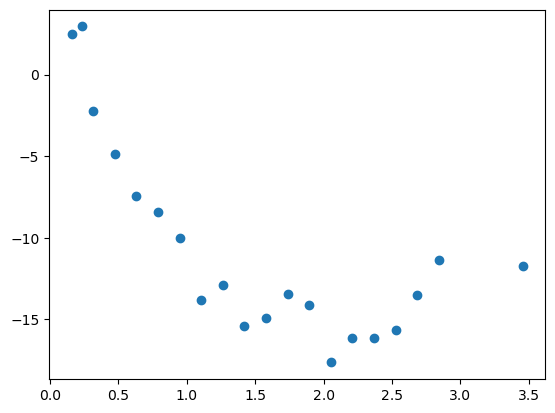

In [2]:
x_data = np.array([ 0.23547456, 0.15789474, 0.31578947, 0.47368421, 0.63157895, 
                   0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263, 
                   1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632, 
                   2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.45454545 ])
y_data = np.array([ 2.95258285, 2.49719803, -2.1984975, -4.88744346, -7.41326345, 
                   -8.44574157, -10.01878504, -13.83743553, -12.91548145, -15.41149046, 
                   -14.93516299, -13.42514157, -14.12110495, -17.6412464 , -16.1275509 , 
                   -16.11533771, -15.66076021, -13.48938865, -11.33918701, -11.70467566])
 
plt.scatter(x_data , y_data)
plt.show()

In [3]:
def model_f(x,a,b,c):
  return a*(x-b)**2+c

In [4]:
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[3,2,-16])

In [5]:
popt

array([  4.34571181,   2.16288856, -16.22482919])

In [6]:
pcov

array([[ 0.19937578, -0.02405734, -0.1215353 ],
       [-0.02405734,  0.00517302,  0.00226607],
       [-0.1215353 ,  0.00226607,  0.29163784]])

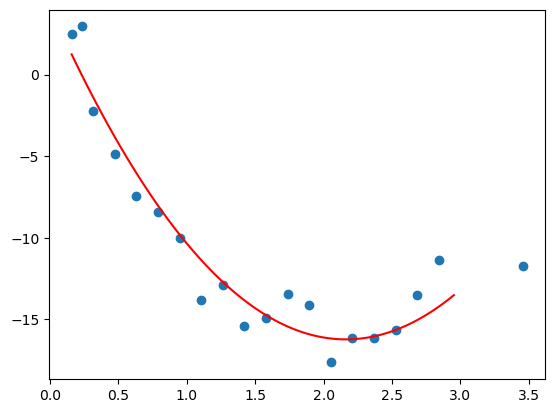

In [7]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(y_data), 100)
y_model = model_f(x_model, a_opt, b_opt, c_opt) 
 
plt.scatter(x_data, y_data)
plt.plot(x_model, y_model, color='r')
plt.show()

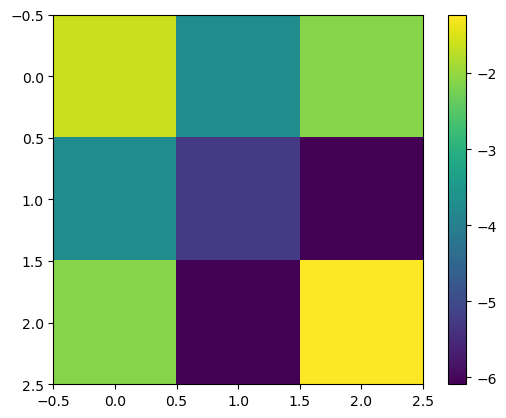

In [8]:
plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()
plt.show()

Logistic curve model of cavitation erosion progress in metallic materials

The authors previously found that the change in volume loss rate with the exposure time can be expressed by a logistic curve. In this study, the validity of this model is examined for various materials such as pure aluminum, carbon steels, stainless steels, cobalt alloys, and so on. The MDE (mean depth of erosion) d as a function of the exposure time can be expressed by three parameters α, β and c as in the following equation:

The parameters α, β and c are derived from the relation between the nominal incubation period and the slope of the maximum rate stage, from the average thickness of the removed layer when the nominal incubation period is terminated, and from an arbitrary point (t0, d0) of the MDE in the maximum rate stage. We conclude that the calculated curve based on this model is in good agreement with the MDE data points for various materials, test conditions and test methods.


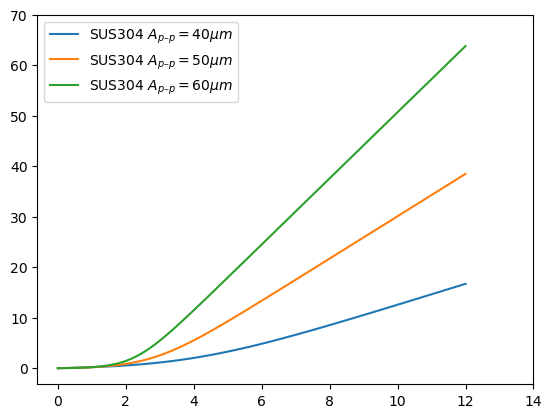

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def Hattori2010855(a, b, c, t):
    """
    Implements the Logistic curve model
    Hattori2010855


    a - (1/h)
    b - (1/um)
    c - (-)
    t - (hr)
    """
    
    import numpy as np
    cum_loss = (a/b)*t - (1/b)*np.log((1+c)/(1+c*np.exp(-a*t)))
    
    return cum_loss
    
    
# From Table 6    
fig, ax = plt.subplots()

t = np.linspace(0, 12, 100) #hr
mde = Hattori2010855(0.675, 0.323, 14.0, t)
ax.plot(t, mde, label="SUS304 $A_{p–p} = 40 μm$")

mde = Hattori2010855(1.33, 0.317, 42.0, t)
ax.plot(t, mde, label="SUS304 $A_{p–p} = 50 μm$")

mde = Hattori2010855(2.07, 0.316, 107, t)
ax.plot(t, mde, label="SUS304 $A_{p–p} = 60 μm$")
ax.set_xlim(right=14)
ax.set_ylim(top=70)
ax.legend()



a - thickness of eroded layer
K = constant in the stress-strain relationship
l, L - depth of hardened layers
n = exponent in the stress-strain relationship
r - radius
x = distance from the surface
e = strain
o - stress
theta - metallurgical shape factor






rho - density
S_o - exposed area





Berchiche2002601



material characterization
- tensile test
n = exponent in the stress-strain relationship
K = constant in the stress-strain relationship
sigma = stress
sigma_e - elastic stress
sigma_r - rupture stress
sigma_s - surface stress

microhardness measurements
L - depth of hardened layers
theta - metallurgical shape factor



Berchiche2002601 - Cavitation Erosion Model

In [44]:
import sympy as sp

a = sp.Symbol(r'a')
l = sp.Symbol(r'l')
L = sp.Symbol(r'L')
theta = sp.Symbol(r'\theta')
e_s = sp.Symbol(r'\epsilon_s')
e_r = sp.Symbol(r'\epsilon_r')

x = sp.Symbol(r'x')
e = sp.Function('e')(x)

o = sp.Function('o')(e)
o_e = sp.Symbol('\sigma_e')
K = sp.Symbol('K')
n = sp.Symbol('n')
#o_e = 400e6 # Pa sp.Symbol('\sigma_e')
#K = 900e6 # Pa sp.Symbol('K')
#n = 0.5   # sp.Symbol('n')

e_r = 0.47

eq1 = sp.Eq(e, e_s*(1 - x/l)**theta)
eq1

eq2_RHS = L*( (e_s/e_r)**(1/theta) - 1 )
eq2_LHS = a
eq2 = sp.Eq(eq2_LHS, eq2_RHS)
eq2

eq3 = sp.Eq(e, e_r*(1 - x/L)**theta)
eq3

eq4 = sp.Eq(l, L*(e_s/e_r)**(1/theta))
eq4

eq6 = sp.Eq(o, o_e + K*e**n)
#eq6.subs(e,e_r)

Eq(o(0.47), 1017008914.03609)

In [51]:
# Substitute stuff
for eq in [eq1, eq2, eq3, eq4, eq6]:
    print(eq)
    eq = eq.subs(o_e, 400e6) # Pa sp.Symbol('\sigma_e')
    eq = eq.subs(K, 900e6) # Pa sp.Symbol('K')
    eq = eq.subs(n, 0.5)   # sp.Symbol('n')
    eq = eq.subs(L, 200e-6) # m
    eq = eq.subs(theta, 5.0)
    eq = eq.subs(e_r, 0.47)
    print(eq)
    print()

Eq(e(x), \epsilon_s*(1 - x/l)**\theta)
Eq(e(x), \epsilon_s*(1 - x/l)**5.0)

Eq(a, L*((2.12765957446809*\epsilon_s)**(1/\theta) - 1))
Eq(a, 0.000232600382236332*\epsilon_s**0.2 - 0.0002)

Eq(e(x), 0.47*(1 - x/L)**\theta)
Eq(e(x), 1.46875e+18*(0.0002 - x)**5.0)

Eq(l, L*(2.12765957446809*\epsilon_s)**(1/\theta))
Eq(l, 0.000232600382236332*\epsilon_s**0.2)

Eq(o(e(x)), 900000000.0*e(x)**0.5 + 400000000.0)
Eq(o(e(x)), 900000000.0*e(x)**0.5 + 400000000.0)



In [46]:
eq2

Eq(a, L*((2.12765957446809*\epsilon_s)**(1/\theta) - 1))

Micu2017894 - A New Model for the Equation Describing the Cavitation Mean Depth Erosion Rate Curve

In [ ]:
def Micu2017894(A,B,C,t):
    import numpy as np
    cum_loss = A*t*(1-np.exp(-B*t))+(-C/2)*t*t    
    ero_rate = A*(1-np.exp(-B*t))+A*B*t*np.exp(-B*t)-C*t
    
    return [cum_loss, ero_loss]


In [ ]:
Bordeacsu2006new - New Contributions to Cavitation
Erosion Curves Modeling

In [ ]:
def Bordeacsu2006new(a, b, c, t):
    
    import numpy as np
    
    cum_loss = a*t - b*t*np.exp(-c*t)
    ero_loss = (a - b*np.exp(-b*t) + b*c*t*np.exp(-b*t))

    return [cum_loss, ero_loss]